In [1]:
# basic python data handling analysis modules
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set()
import pickle, os, gc, re
# small utility functions
from utility import *

# interactive jupyter widgets!
# https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

%matplotlib inline

In [3]:
Dataset_directory = ".."+os.sep+"Datasets"+os.sep

In [4]:
INT_df = pd.read_msgpack(Dataset_directory+"Processed"+os.sep+"INT_df_with_aggregate"+".msgpack")
tv_series_mislabelled_as_a_movie = INT_df[INT_df["TMB_tv_not_film"]==1].index
INT_df.drop(tv_series_mislabelled_as_a_movie,inplace=True)

In [90]:
search(INT_df,"year")

TMB_release_year               45271
TMB_years_since_first_movie    45271
HETREC_year                    10194
NUM_release_year                5249
release_year                   49513
SER_release_year               46194
dtype: int64

In [97]:
# TMB_runtime, release_year
search(INT_df,"TMB_runtime")

TMB_runtime    43539
dtype: int64

In [83]:
# I wonder if MovieLens would like to pay me for fixing their data?
INT_df.loc[8688,"SER_releaseDate"] = "1968-12-13" # Shalako 13 December 1968
INT_df.loc[33471,"SER_releaseDate"] = "2002-04-05" # https://www.imdb.com/title/tt0292553/?ref_=fn_al_tt_1
INT_df.loc[46121,"SER_releaseDate"] = "2001-06-01" # https://www.imdb.com/title/tt0135024/releaseinfo?ref_=tt_dt_dt
INT_df.loc[47991,"SER_releaseDate"] = "2005-06-09" # https://www.imdb.com/title/tt0383304/releaseinfo?ref_=tt_dt_dt
INT_df.loc[42941,"SER_releaseDate"] = "1974-08-08" # https://www.imdb.com/title/tt0071840/releaseinfo?ref_=tt_dt_dt
INT_df.loc[59300,"SER_releaseDate"] = "1986-09-12" # https://www.imdb.com/title/tt0090678/releaseinfo?ref_=tt_dt_dt
INT_df.loc[55631,"SER_releaseDate"] = "2006-03-17" # https://www.imdb.com/title/tt0443446/releaseinfo?ref_=tt_dt_dt
INT_df.loc[60034,"SER_releaseDate"] = "2007-01-22" # https://www.imdb.com/title/tt0893331/releaseinfo?ref_=tt_dt_dt
INT_df.loc[97703,"SER_releaseDate"] = "2012-05-07" # https://www.imdb.com/title/tt2209386/releaseinfo?ref_=tt_dt_dt
INT_df.loc[105159,"SER_releaseDate"] = "2012-07-13" # https://www.imdb.com/title/tt1859446/releaseinfo?ref_=tt_dt_dt
INT_df.loc[105453,"SER_releaseDate"] = "2013-09-19" # https://www.imdb.com/title/tt2717558/releaseinfo?ref_=tt_dt_dt
INT_df.loc[105855,"SER_releaseDate"] = "2013-10-11" # https://www.imdb.com/title/tt2286990/releaseinfo?ref_=tt_dt_dt
INT_df.loc[109455,"SER_releaseDate"] = "2014-02-21" # https://www.imdb.com/title/tt2980794/releaseinfo?ref_=tt_dt_dt
INT_df.loc[57486,"SER_releaseDate"] = "1970-10-23" # https://www.imdb.com/title/tt0066578/releaseinfo?ref_=tt_dt_dt
INT_df.loc[53502,"SER_releaseDate"] = "1948-04-27" # https://www.imdb.com/title/tt0040098/releaseinfo?ref_=tt_dt_dt
INT_df.loc[60049,"SER_releaseDate"] = "2007-05-30" # https://www.imdb.com/title/tt0832937/releaseinfo?ref_=tt_dt_dt



In [88]:
INT_df["SER_releaseDate"] = pd.to_datetime(INT_df["SER_releaseDate"].replace("0000-00-00",np.nan)).apply(lambda x: x.date())
INT_df["SER_release_year"]  = INT_df["SER_releaseDate"].apply(lambda x: x.year)
INT_df["SER_release_month"] = INT_df["SER_releaseDate"].apply(lambda x: x.month)
INT_df["SER_release_day"]   = INT_df["SER_releaseDate"].apply(lambda x: x.day)

# this represents a very informal sensse of which source is most authoritative!
# TMB user content - least reliable, NUM website focused on accurate
# HETREC and SER are MovieLens data - not bad, but maybe not so well checked (HETREC in particular has problems)
INT_df["release_year"] = INT_df[['TMB_release_year','HETREC_year','SER_release_year','NUM_release_year']].fillna(method="ffill",axis=1)["NUM_release_year"]

INT_df["release_month"] = INT_df[['TMB_release_month','SER_release_month','NUM_release_month']].fillna(method="ffill",axis=1)["NUM_release_month"]

INT_df["release_day"] = INT_df[['TMB_release_day','SER_release_day','NUM_release_day']].fillna(method="ffill",axis=1)["NUM_release_day"]

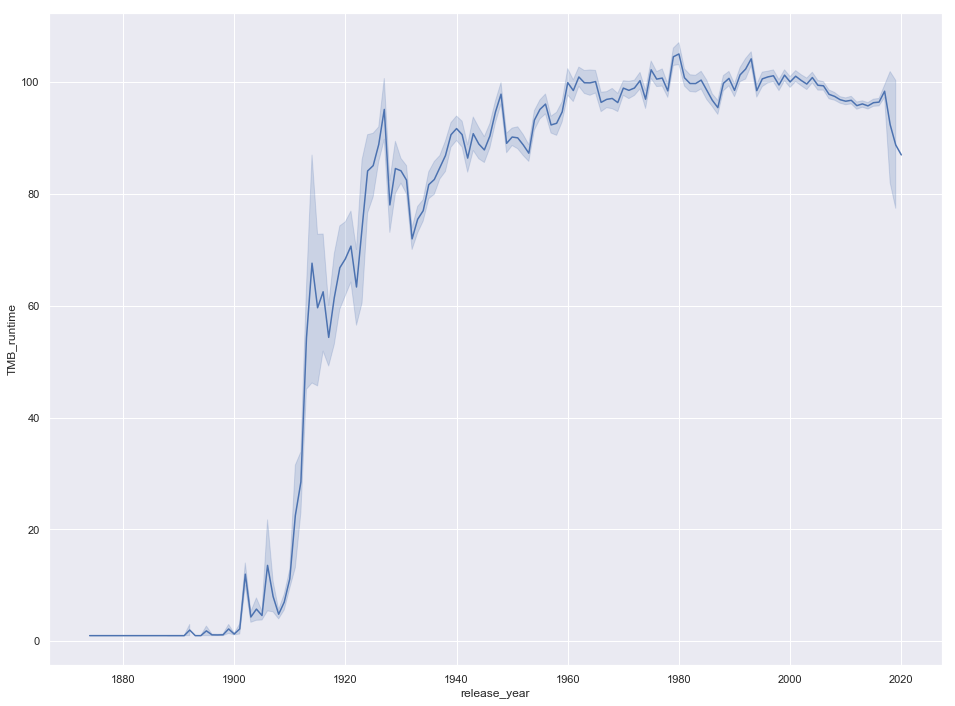

In [108]:
# sns.set()
plt.figure(figsize=(16,12));
sns.lineplot(x="release_year", y="TMB_runtime", data=INT_df, ci=68);

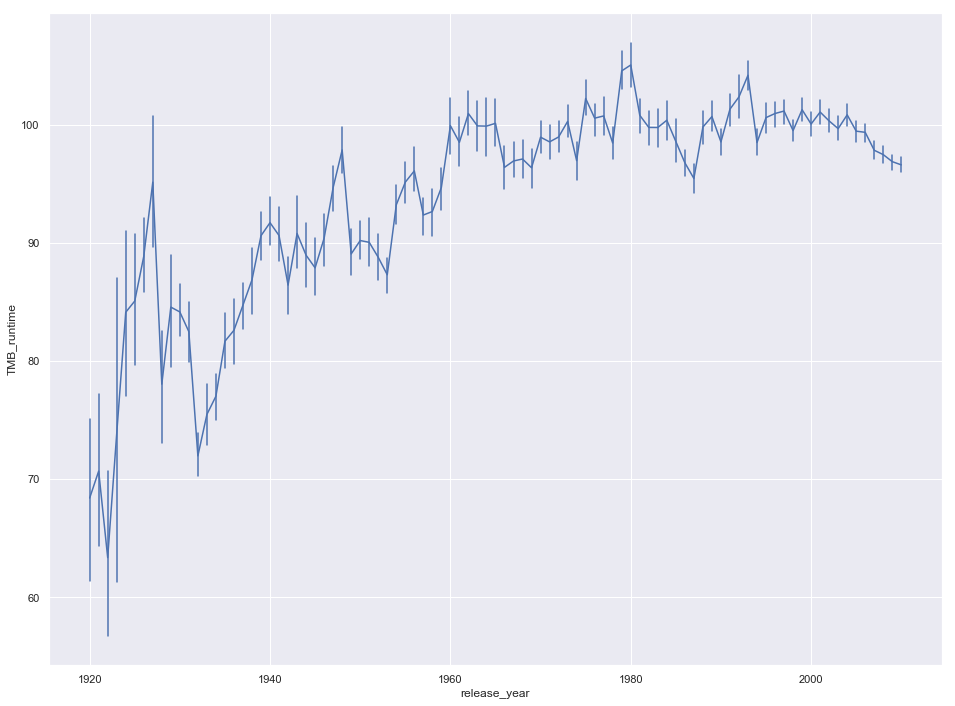

In [109]:
# sns.set()
plt.figure(figsize=(16,12));
sns.lineplot(x="release_year", y="TMB_runtime", data=INT_df[ (INT_df["release_year"]<=2010)
                                                            &(INT_df["release_year"]>=1920)], ci=68,err_style ='bars');

In [110]:
release_decade = INT_df["release_year"].apply(lambda x: str(int(10*np.floor(x/10))) if pd.notnull(x) else np.nan)


In [111]:
release_decade.value_counts()

2010    14642
2000    11833
1990     5896
1980     4172
1970     3800
1960     3003
1950     2213
1940     1645
1930     1453
1920      452
1910      198
1900      110
1890       85
1880        6
2020        3
1870        2
Name: release_year, dtype: int64

Index(['1890', '1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970',
       '1980', '1990', '2000', '2010'],
      dtype='object')

In [119]:
release_decade.replace(["1880","1870","2020"], np.nan,inplace=True)

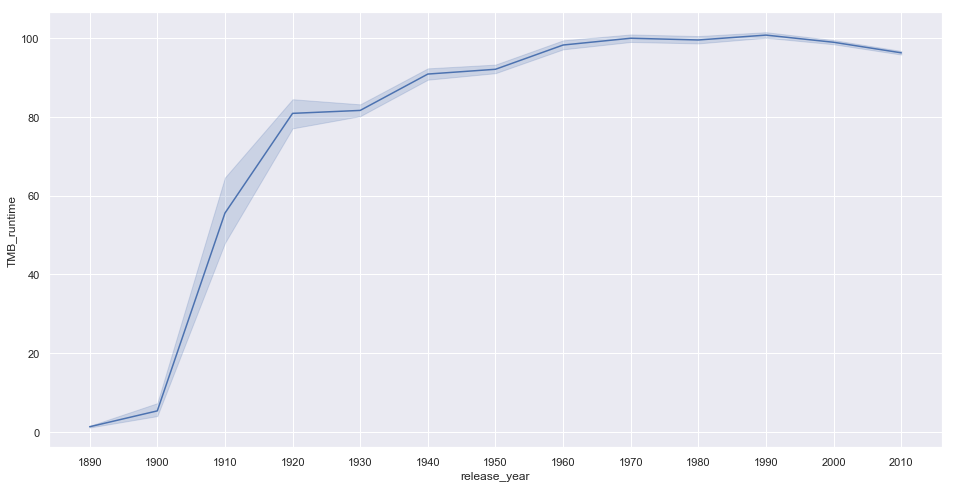

In [123]:
plt.figure(figsize=(16,8));
sns.lineplot(x=release_decade, y=INT_df["TMB_runtime"]);

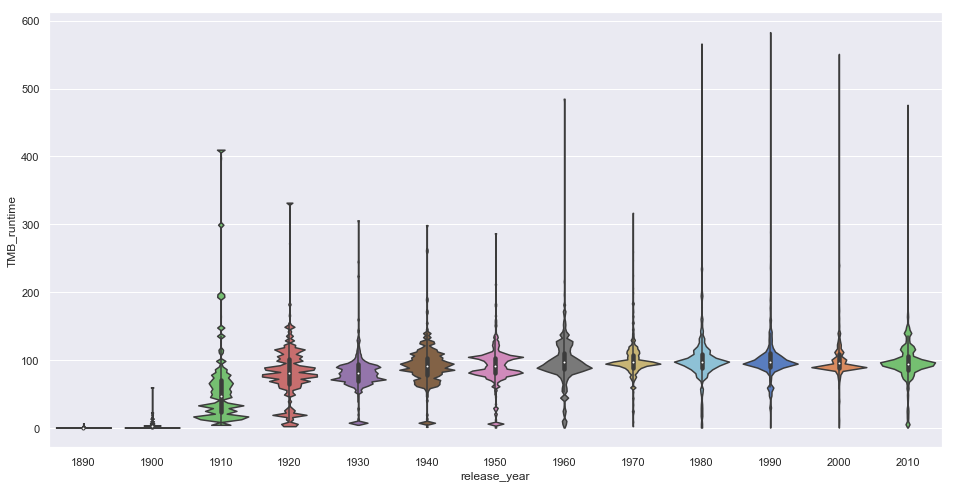

In [137]:
plt.figure(figsize=(16,8));
sns.violinplot(x=release_decade, y=INT_df["TMB_runtime"],
               order = release_decade.value_counts().sort_index().index,
              palette='muted', scale='width', cut=0,bw=.01);
# probably not the bandwidth granularity to go with, but has a nice Rorschach feel to it "Which of these butterflies would you like to murder while pretending it's your mother?"

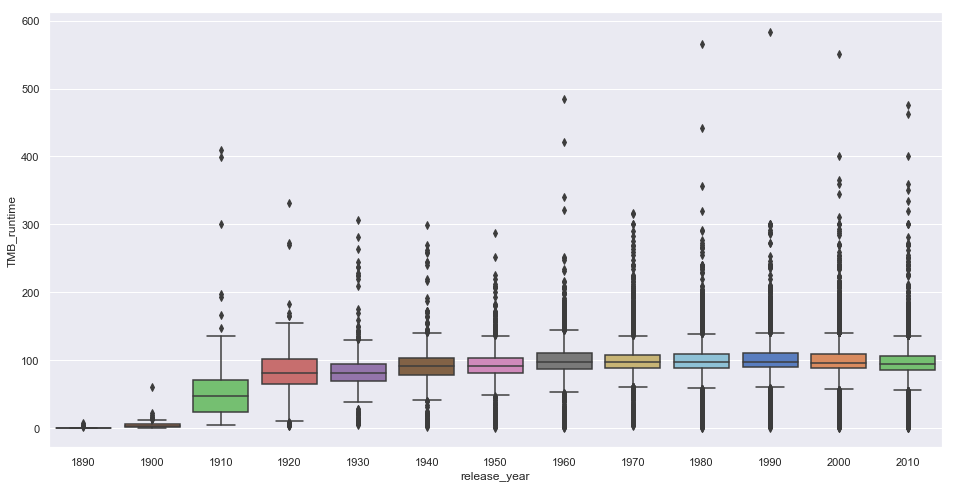

In [139]:
plt.figure(figsize=(16,8));
sns.boxplot(x=release_decade, y=INT_df["TMB_runtime"],
               order = release_decade.value_counts().sort_index().index,
              palette='muted',);


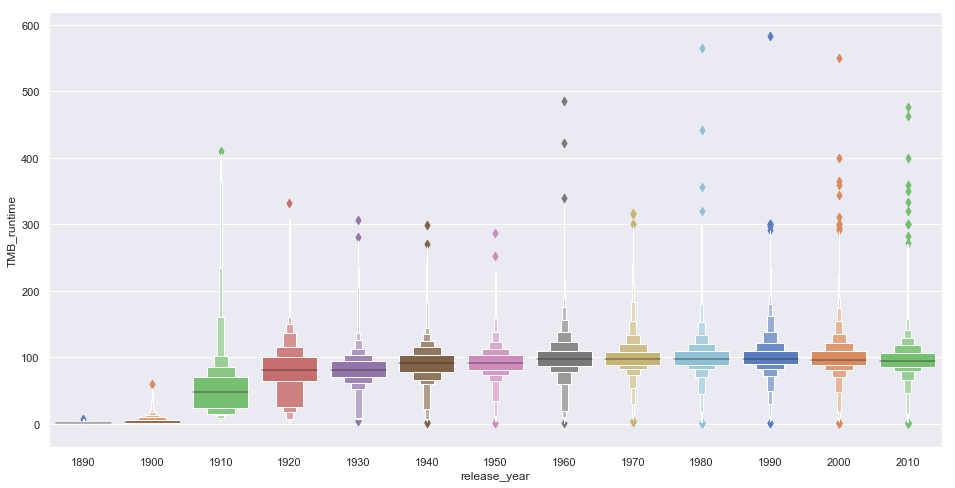

In [140]:
plt.figure(figsize=(16,8));
sns.boxenplot(x=release_decade, y=INT_df["TMB_runtime"],
               order = release_decade.value_counts().sort_index().index,
              palette='muted',);
# I think this wins on cuteness

In [145]:
# # unspeakably slow! c
# plt.figure(figsize=(16,8));
# sns.swarmplot(x=release_decade, y=INT_df["TMB_runtime"], order = release_decade.value_counts().sort_index().index);

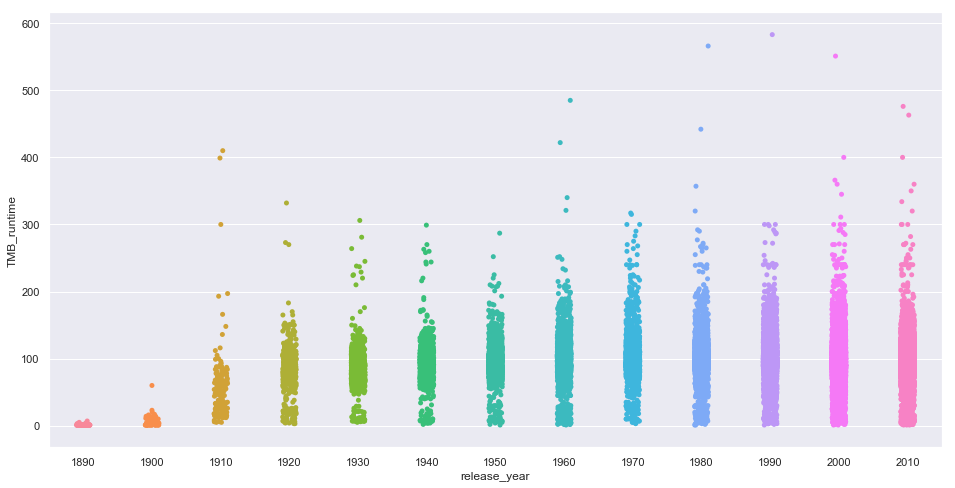

In [143]:
plt.figure(figsize=(16,8));
sns.stripplot(x=release_decade, y=INT_df["TMB_runtime"], order = release_decade.value_counts().sort_index().index);

In [178]:
release_decade.value_counts().sort_index().index

Index(['1890', '1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970',
       '1980', '1990', '2000', '2010'],
      dtype='object')

Int64Index([   920,    948,   1204,   1227,   1287,   1306,   1411,   2019,
              3092,   3246,
            ...
            173421, 173641, 173713, 173759, 174403, 174905, 175117, 175315,
            176183, 176271],
           dtype='int64', name='movieId', length=259)

<Figure size 1152x576 with 0 Axes>

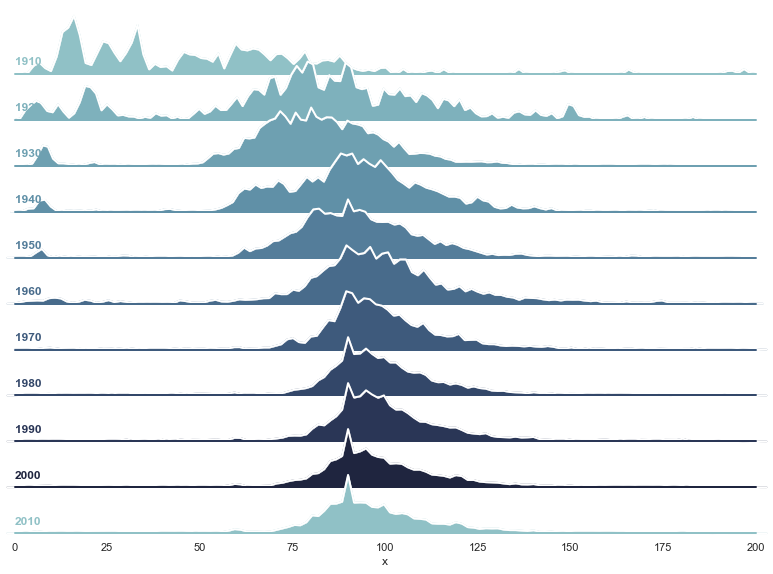

In [206]:

# https://seaborn.pydata.org/examples/kde_ridgeplot.html
# yoink!
plt.figure(figsize=(16,8));

# sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
# rs = np.random.RandomState(1979)
# x = rs.randn(500)
# g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=INT_df["TMB_runtime"], g=release_decade)).dropna()
df.drop(df[df["g"].apply(lambda x: x in ["1890","1900"])].index, inplace=True)
df.drop(df[df["x"]>200].index, inplace=True)

# m = df.g.map(ord)
# df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.75, palette=pal,
                  row_order = ['1910', '1920', '1930', '1940', '1950', '1960', '1970',
       '1980', '1990', '2000', '2010'], sharey=False);

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=1)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=1)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes);


g.map(label, "x");

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25);
plt.xlim((0,200))

# Remove axes details that don't play well with overlap
g.set_titles("");
g.set(yticks=[]);
g.despine(bottom=True, left=True);